In [2]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [3]:
#import and read in csv
nuance_df = pd.read_csv("Sales_Item_Merged.csv")
nuance_df['year'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).year.astype(object)
nuance_df['month'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).month.astype(object)
nuance_df

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,Item_Add_date,year,month
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,6/12/2015,2019,3
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,6/12/2015,2019,5
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015,2020,2
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015,2020,4
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24374,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,9/24/2019,2019,9
24375,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,10/11/2019,2019,10
24376,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,10/11/2019,2019,10
24377,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,10/14/2019,2019,10


## Top Items vs. Customers Purchasing

In [46]:
#2019 data frame
twenty_19_sales = nuance_df.loc[nuance_df['year']== 2019]

#2020 data frame
twenty_20_sales = nuance_df.loc[nuance_df['year']== 2020]

In [101]:
# Determine Top Items 2019
top_items_df_2019 = twenty_19_sales.groupby(["id_item", "descr_1"]).sum()
top_items_df_2019.sort_values(by='qty_ship',
                      ascending=False).head(10)

,,qty_ship,price_net
id_item,descr_1,,
LW09,PROXEL GXL (DEWOLF CHEM),2893106,51335.59
8289PLI600,BORDER 8L 331-TK LAMBERTI,570819,696399.18
6378SEV034,22810 7GEN DISF MULTI SURF,205989,1434360.43
8262PLI600,FS AMS MAX DR BULK 339-TKG,146907,152783.28
1600NUC040,NU-BRITE COIL CLNR (4291-08),135086,2154237.70
8289PLI601,BORDER 8L LAMBERTI 331-TK,84710,3388.40
NFCL16RDEA,"PINK 300GSM 16""CLOTH RD CORNER",68952,38243.88
NFCL16BLEA,NUFIBER GLASS/MIRR 16X16 BLUE,66384,56403.36
NFCL16BUEA,"BLUE 300GSM 16""CLOTH RD CORNER",65472,38664.24


In [102]:
# Determine Top Items 2020
top_items_df_2020 = twenty_20_sales.groupby(["id_item", "descr_1"]).sum()
top_items_df_2020.sort_values(by='qty_ship',
                      ascending=False).head(10)

,,qty_ship,price_net
id_item,descr_1,,
8289PLI600,BORDER 8L 331-TK LAMBERTI,519108,633311.76
8289PLI601,BORDER 8L LAMBERTI 331-TK,188231,7801.82
VG28,"BOTTLE, SEV 26OZ",180901,51973.31
WM97,"CAP, SHARK 28/400 S-327 SEAL",163800,6257.16
VI44,"BOTTLE, 12 OZ SHARK BLUE",163800,53316.90
WM120,"CAP, SEV/CW SPRAY WHITE",162000,53460.00
1805EUP080,SHARK COMET VCM60 WATERFALL,149567,1112778.82
6378SEV034,22810 7GEN DISF MULTI SURF,148560,1175026.38
7073MMM030,3M TB QUAT DISINFECTANT,137873,1126422.41


In [127]:
new_new_df_2019 = top_items_df_2019.reset_index(level=0).sort_values(by='qty_ship',
                      ascending=False)
new_new_df_2019.head(10)

,id_item,qty_ship,price_net
descr_1,,,
PROXEL GXL (DEWOLF CHEM),LW09,2893106,51335.59
BORDER 8L 331-TK LAMBERTI,8289PLI600,570819,696399.18
22810 7GEN DISF MULTI SURF,6378SEV034,205989,1434360.43
FS AMS MAX DR BULK 339-TKG,8262PLI600,146907,152783.28
NU-BRITE COIL CLNR (4291-08),1600NUC040,135086,2154237.70
BORDER 8L LAMBERTI 331-TK,8289PLI601,84710,3388.40
"PINK 300GSM 16""CLOTH RD CORNER",NFCL16RDEA,68952,38243.88
NUFIBER GLASS/MIRR 16X16 BLUE,NFCL16BLEA,66384,56403.36
"BLUE 300GSM 16""CLOTH RD CORNER",NFCL16BUEA,65472,38664.24


In [125]:
new_new_df_2020 = top_items_df_2020.reset_index(level=0).sort_values(by='qty_ship',
                      ascending=False)
new_new_df_2020.head(10)

,id_item,qty_ship,price_net
descr_1,,,
BORDER 8L 331-TK LAMBERTI,8289PLI600,519108,633311.76
BORDER 8L LAMBERTI 331-TK,8289PLI601,188231,7801.82
"BOTTLE, SEV 26OZ",VG28,180901,51973.31
"CAP, SHARK 28/400 S-327 SEAL",WM97,163800,6257.16
"BOTTLE, 12 OZ SHARK BLUE",VI44,163800,53316.90
"CAP, SEV/CW SPRAY WHITE",WM120,162000,53460.00
SHARK COMET VCM60 WATERFALL,1805EUP080,149567,1112778.82
22810 7GEN DISF MULTI SURF,6378SEV034,148560,1175026.38
3M TB QUAT DISINFECTANT,7073MMM030,137873,1126422.41


<AxesSubplot:title={'center':'Top Products 2019'}, xlabel='Product Name', ylabel='Quantity'>

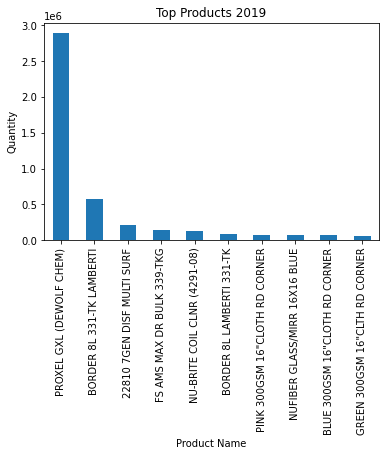

In [131]:
plot_2019 = new_new_df_2019['qty_ship'].head(10).plot(kind="bar")
plot_2019.set_xlabel("Product Name")
plot_2019.set_ylabel("Quantity")
plot_2019.set_title("Top Products 2019")

plot_2019

<AxesSubplot:title={'center':'Top Products 2020'}, xlabel='Product Name', ylabel='Quantity'>

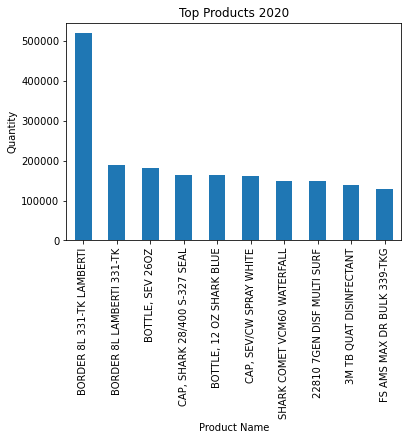

In [126]:
plot_2020 = new_new_df_2020['qty_ship'].head(10).plot(kind="bar")
plot_2020.set_xlabel("Product Name")
plot_2020.set_ylabel("Quantity")
plot_2020.set_title("Top Products 2020")

plot_2020

In [134]:
twenty19_labels = new_new_df_2019.head(10).index
twenty20_labels = new_new_df_2020.head(10).index

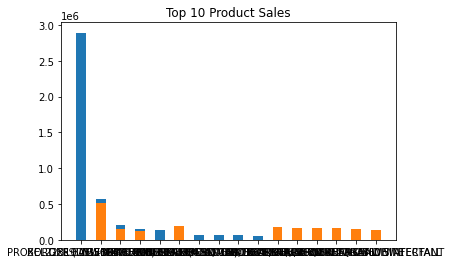

In [137]:
plt.bar(height = new_new_df_2019['qty_ship'].head(10), x = twenty19_labels, width = .5)
plt.bar(height = new_new_df_2020['qty_ship'].head(10), x = twenty20_labels, width = .5)
plt.title("Top 10 Product Sales")
plt.show()

In [139]:
# Determine number of Customers Purchasing
customers_df_2019 = twenty_19_sales.groupby(["name_cust"]).sum().sort_values(by='qty_ship',
                      ascending=False)
customers_df_2019.head(10)

,qty_ship,price_net
name_cust,,
PRECISION LABORATORIES LLC,3759387,2724428.98
"NU-CALGON WHOLESALERS, INC.",360624,6474975.52
CLEANWELL LLC,268959,2121668.18
EDWARD DON & CO.,150228,150044.71
ALLIED EAGLE SUPPLY,114000,132238.14
CHARLOTTE PRODUCTS LTD.,89641,1328310.99
MASSCO MAINTENANCE SUPPLY,73104,113838.30
NORTH AMERICAN CORPORATION,60626,72403.35
WAREHOUSE DIRECT,60246,64269.80


In [140]:
customers_df_2020 = twenty_20_sales.groupby(["name_cust"]).sum().sort_values(by='qty_ship',
                      ascending=False)
customers_df_2020.head(10)

,qty_ship,price_net
name_cust,,
PRECISION LABORATORIES LLC,908458,2683314.01
SHARK NINJA OPERATING LLC,868030,1917844.63
CLEANWELL LLC,640264,4247280.07
"NU-CALGON WHOLESALERS, INC.",360771,5866557.86
GENLABS MANUFACTURING,280656,76110.57
3M COMPANY,173645,1450698.19
NORTH AMERICAN CORPORATION,135521,95825.13
ALLIED EAGLE SUPPLY,132929,149030.28
CHARLOTTE PRODUCTS LTD.,116050,1828122.11
